### Initial Setup
Importing the `pandas` library and setting `matplotlib` to display plots inside the notebook

In [1]:
import pandas as pd
%matplotlib inline

pd has been loaded correctly

In [2]:
pd

<module 'pandas' from 'C:\\Users\\XPS\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

### Loading the data
loading the Carbon Footprint dataset using `read_csv` method

In [3]:
df = pd.read_csv('data/CarbonFootprintBreakdown.csv')

### Exploring the data

In [4]:
df.head()  # showing the first 5 rows

,FeatureCode,DateCode,Measurement,Units,Value,Breakdown of Scotland's carbon footprint
0,S92000003,2008,Count,Mt Co2Equiv,46.102,Embedded in imported goods and services
1,S92000003,2001,Count,Mt Co2Equiv,34.693,Embedded in imported goods and services
2,S92000003,2007,Count,Mt Co2Equiv,51.135,Embedded in imported goods and services
3,S92000003,2002,Count,Mt Co2Equiv,36.802,Embedded in imported goods and services
4,S92000003,2003,Count,Mt Co2Equiv,37.500,Embedded in imported goods and services


In [5]:
df.tail()  # showing the last 5 rows

,FeatureCode,DateCode,Measurement,Units,Value,Breakdown of Scotland's carbon footprint
67,S92000003,2011,Count,Mt Co2Equiv,27.114,UK produced goods and services consumed by Sco...
68,S92000003,2015,Count,Mt Co2Equiv,22.698,UK produced goods and services consumed by Sco...
69,S92000003,1998,Count,Mt Co2Equiv,36.323,UK produced goods and services consumed by Sco...
70,S92000003,2013,Count,Mt Co2Equiv,25.813,UK produced goods and services consumed by Sco...
71,S92000003,2012,Count,Mt Co2Equiv,26.887,UK produced goods and services consumed by Sco...


In [6]:
df.shape  # showing size of the dataset (rows, columns)

(72, 6)

In [7]:
df.columns  # showing the name of the columns

Index(['FeatureCode', 'DateCode', 'Measurement', 'Units', 'Value',
       'Breakdown of Scotland's carbon footprint'],
      dtype='object')

In [8]:
df['FeatureCode']  # selecting a specific column

0     S92000003
1     S92000003
2     S92000003
3     S92000003
4     S92000003
5     S92000003
6     S92000003
7     S92000003
8     S92000003
9     S92000003
10    S92000003
11    S92000003
12    S92000003
13    S92000003
14    S92000003
15    S92000003
16    S92000003
17    S92000003
18    S92000003
19    S92000003
20    S92000003
21    S92000003
22    S92000003
23    S92000003
24    S92000003
25    S92000003
26    S92000003
27    S92000003
28    S92000003
29    S92000003
        ...    
42    S92000003
43    S92000003
44    S92000003
45    S92000003
46    S92000003
47    S92000003
48    S92000003
49    S92000003
50    S92000003
51    S92000003
52    S92000003
53    S92000003
54    S92000003
55    S92000003
56    S92000003
57    S92000003
58    S92000003
59    S92000003
60    S92000003
61    S92000003
62    S92000003
63    S92000003
64    S92000003
65    S92000003
66    S92000003
67    S92000003
68    S92000003
69    S92000003
70    S92000003
71    S92000003
Name: FeatureCode, Lengt

In [9]:
df['FeatureCode'].unique()  # checking the unique values of a specific columns

array(['S92000003'], dtype=object)

In [10]:
df['DateCode'].unique()  # taking the unique values of column DateCode
sorted(df['DateCode'].unique())  # .. + sorting them in default (increasing) order
sorted(df['DateCode'].unique(), reverse=True)  # .. + sorting the in reverse (decreasing) order

[2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998]

### Simple plotting of the data

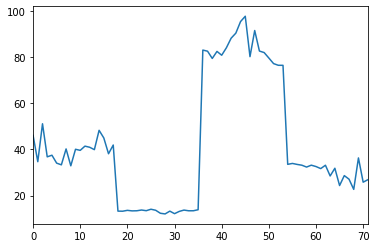

In [11]:
df['Value'].plot.line()
# same as `df['Value'].plot()`, by default it plots a line

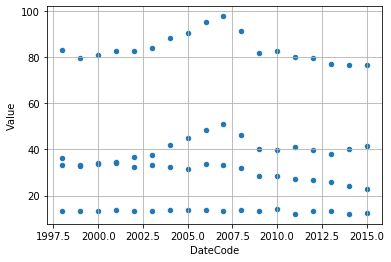

In [12]:
df.plot.scatter(x='DateCode', y='Value', grid=True)  #grid=True adds the gridlines

### Some data-munging
Let's colorcode the data by breakdown:
- grab all the unique breakdown values
- creating a mapping between them and colors (using a dictionary)
- creating a function that uses the dictionary to implement the mapping
- applying the mapping function to create a `color` column

In [13]:
df["Breakdown of Scotland's carbon footprint"].unique()

array(['Embedded in imported goods and services',
       'Directly produced by Scottish residents',
       'Total Carbon Footprint',
       'UK produced goods and services consumed by Scottish residents'],
      dtype=object)

In [14]:
mapping_dictionary = {
    'Embedded in imported goods and services': 'blue',
    'Directly produced by Scottish residents': 'red',
    'Total Carbon Footprint': 'yellow',
    'UK produced goods and services consumed by Scottish residents': 'green'       
}

In [15]:
# example use
mapping_dictionary['Directly produced by Scottish residents']

'red'

In [16]:
def colorise(n):
    mapping_dictionary = {'Embedded in imported goods and services': 'blue',
       'Directly produced by Scottish residents': 'red',
       'Total Carbon Footprint': 'yellow',
       'UK produced goods and services consumed by Scottish residents': 'green'       
    }
    return mapping_dictionary[n]

In [17]:
# example use
colorise('Total Carbon Footprint')

'yellow'

In [18]:
# creating a `color` column made by applying the `colorise` function to the `breakdown` column
df['color'] = df["Breakdown of Scotland's carbon footprint"].apply(colorise)

In [19]:
#checking result
df.head()

,FeatureCode,DateCode,Measurement,Units,Value,Breakdown of Scotland's carbon footprint,color
0,S92000003,2008,Count,Mt Co2Equiv,46.102,Embedded in imported goods and services,blue
1,S92000003,2001,Count,Mt Co2Equiv,34.693,Embedded in imported goods and services,blue
2,S92000003,2007,Count,Mt Co2Equiv,51.135,Embedded in imported goods and services,blue
3,S92000003,2002,Count,Mt Co2Equiv,36.802,Embedded in imported goods and services,blue
4,S92000003,2003,Count,Mt Co2Equiv,37.500,Embedded in imported goods and services,blue


In [20]:
df.tail()

,FeatureCode,DateCode,Measurement,Units,Value,Breakdown of Scotland's carbon footprint,color
67,S92000003,2011,Count,Mt Co2Equiv,27.114,UK produced goods and services consumed by Sco...,green
68,S92000003,2015,Count,Mt Co2Equiv,22.698,UK produced goods and services consumed by Sco...,green
69,S92000003,1998,Count,Mt Co2Equiv,36.323,UK produced goods and services consumed by Sco...,green
70,S92000003,2013,Count,Mt Co2Equiv,25.813,UK produced goods and services consumed by Sco...,green
71,S92000003,2012,Count,Mt Co2Equiv,26.887,UK produced goods and services consumed by Sco...,green


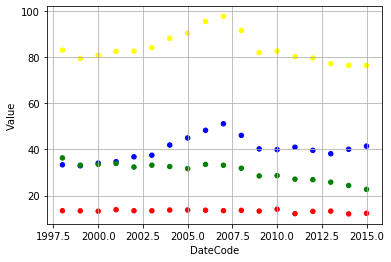

In [21]:
# passing the new column using the coloring parameter `c`
df.plot.scatter(x='DateCode', y='Value', c=df['color'], grid=True)